Here comes a simple code with basic statistics on how TV commercials advertising spending can relate to the outcome sales of a specific product

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

load the csv file and have a look at it

In [4]:
tv_sales_dataset = pd.read_csv('TV_effect_on_Sales.csv')
tv_sales_dataset.head()

,TV,sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


some few statistics 101!

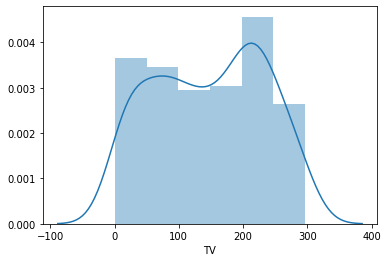

In [6]:
sns.distplot(tv_sales_dataset.TV)

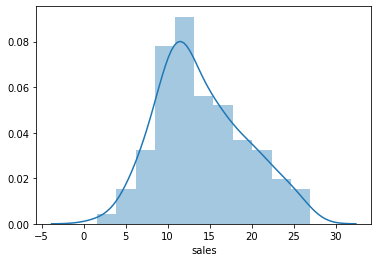

In [7]:
sns.distplot(tv_sales_dataset.sales)

Check the correlation

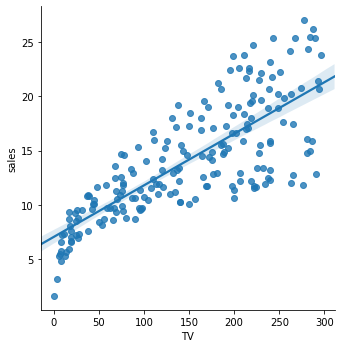

In [9]:
sns.pairplot(tv_sales_dataset, x_vars='TV', y_vars='sales', height=5, aspect=1.0, kind='reg')

pairwise correlation

In [12]:
tv_sales_dataset.TV.corr(tv_sales_dataset.saless)

0.7822244248616066

In [13]:
tv_sales_dataset.corr()

,TV,sales
TV,1.000000,0.782224
sales,0.782224,1.000000


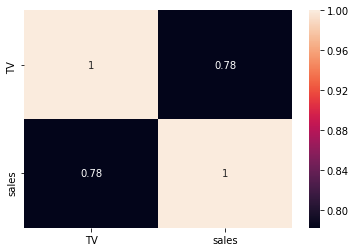

In [14]:
sns.heatmap(tv_sales_dataset.corr(), annot=True)

lets do the linear regression!

In [19]:
feature_tv_vals = tv_sales_dataset[['TV']]

In [20]:
resonse_sales_vals = tv_sales_dataset.sales

In [21]:
print(type(feature_tv_vals))
print(type(resonse_sales_vals))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [22]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(feature_tv_vals, resonse_sales_vals, random_state=1)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(50, 1)
(150,)
(50,)


In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
linReg = LinearRegression()

In [29]:
linReg.fit(X_train, y_train)

/Users/karim/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/base.py:503: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
print(linReg.intercept_)
print(linReg.coef_)
print(linReg.copy_X)
print(linReg.fit)

6.91197261886872
[0.04802945]
True
<bound method LinearRegression.fit of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>


positive intercept value means that increased investment in TV commercials results in more revenue in sales

In [36]:
y_predict = linReg.predict(X_test)
print(y_predict.shape)
print(type(y_predict))
y_predict[:10]

(50,)
<class 'numpy.ndarray'>


array([17.03658069, 16.63793625, 11.50839099, 20.36982452, 19.10184704,
       20.53312465, 14.75518181, 15.59569719, 10.30285179, 17.25751616])

In [37]:
from sklearn import metrics

In [40]:
print(metrics.mean_squared_error(y_test, y_predict))
print(metrics.median_absolute_error(y_test, y_predict))
print(np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

10.310069587813155
2.067687221747729
3.210929707703542
